<a href="https://colab.research.google.com/github/DiegoHuesos/Tesis_deteccion_de_ruido_en_imagenes_con_algoritmo_paralelo_de_agrupamiento/blob/master/Creacion_Datasets_Distintos_Tama%C3%B1os.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de datasets de distintos tamaños

En el presente código, se generan conjuntos de datos de 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000 y 50000 puntos de dos dimensiones utilizando la función `make_blobs` de la librería `sklearn.datasets`, posteriormente, se grafican y se almacena cada conjunto de datos en un archivo de formato `JSON` para su posterior utilización.

Además, se obtienen los valores óptimos de `eps` y de `min_samples` que serán usados para la aplicación del algoritmmo DBSCAN. Estos valores también se guardan en un archivo de formato `JSON`.

## Importación de librerías y función para graficar

In [ ]:
import gc
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [ ]:
def plot_points(X):
  plt.figure(figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], color='blue', marker='o', label='Puntos de Datos')
  plt.title('Distribución de los Puntos de Datos')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()

## Creación de datasets

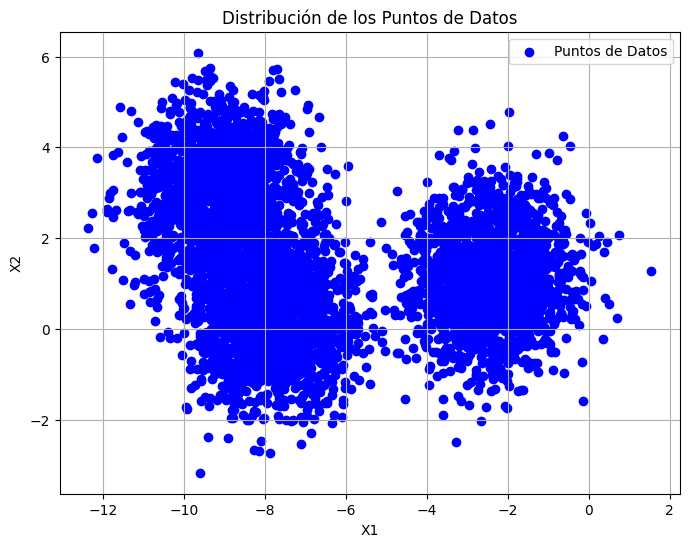

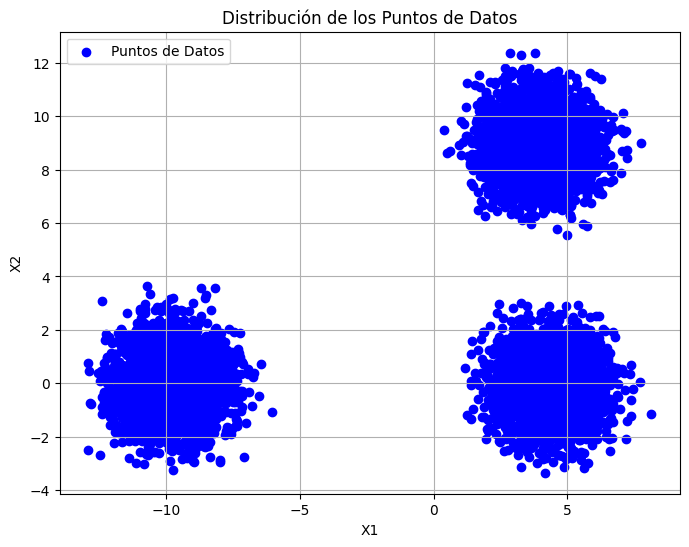

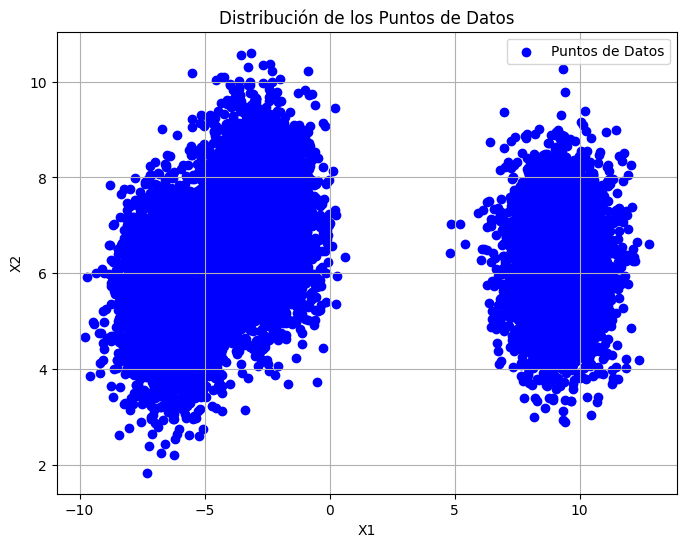

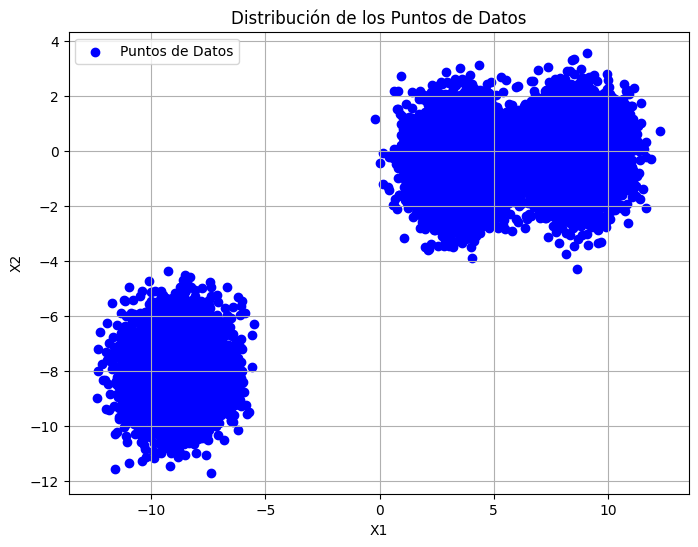

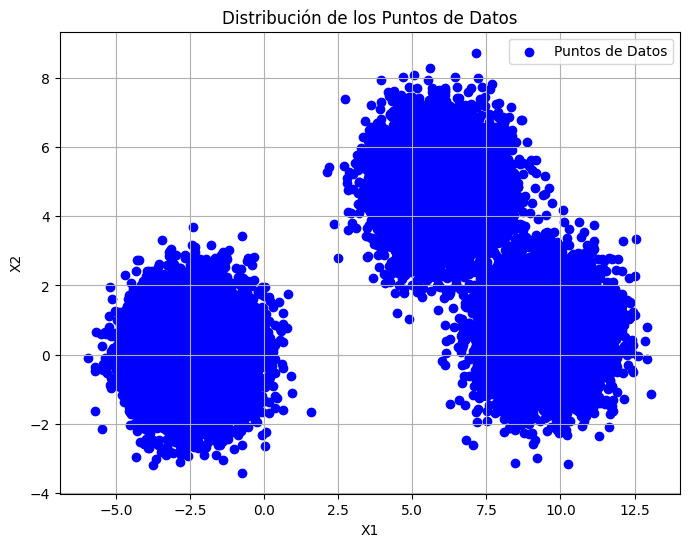

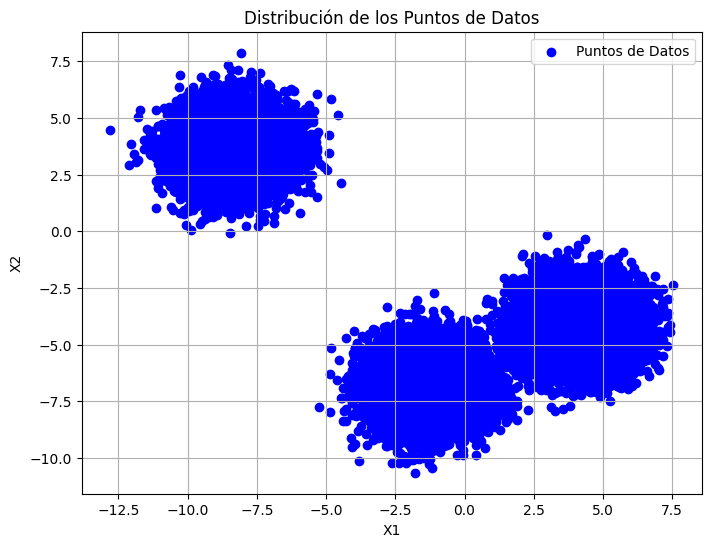

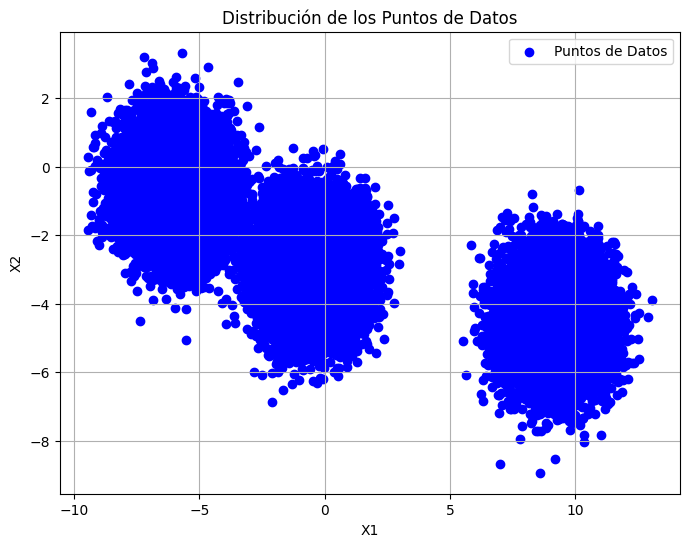

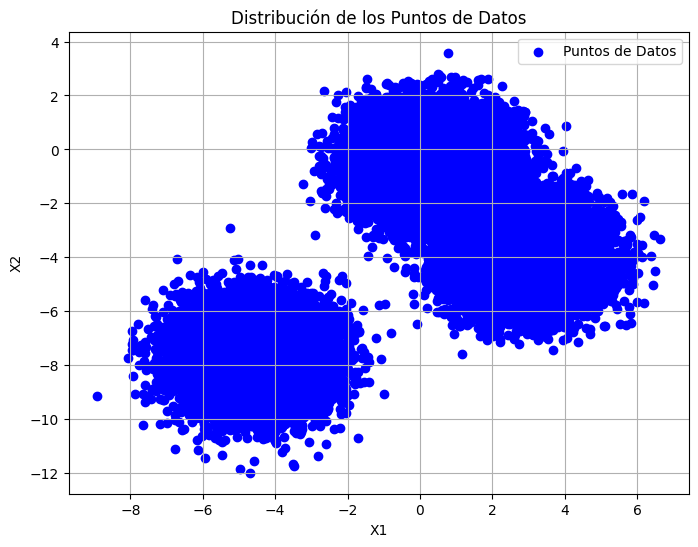

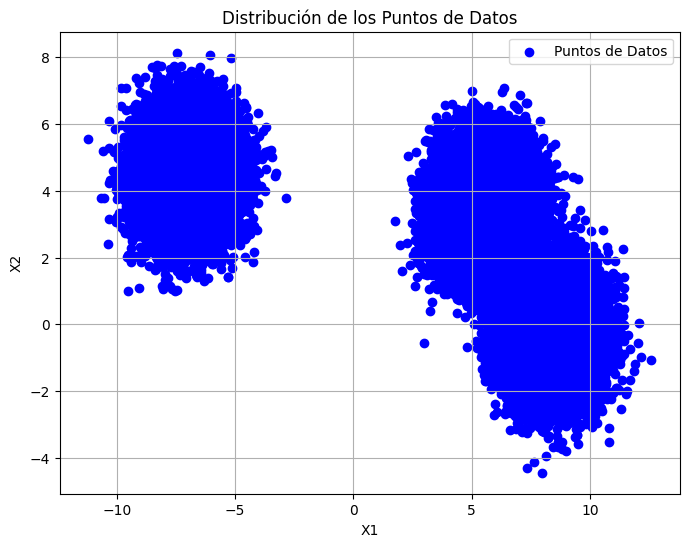

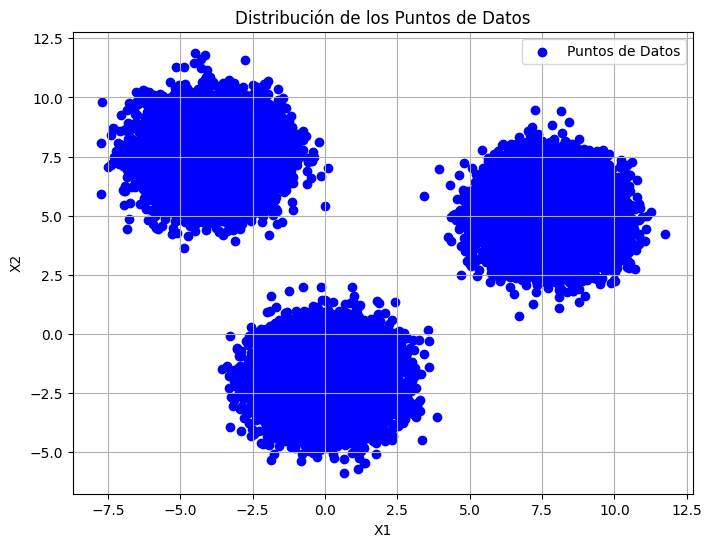

In [ ]:
num_samples = 5000
while num_samples <= 50000:
    dataset = {}
    X, _ = make_blobs(n_samples=num_samples, n_features=2)
    dataset[num_samples] = X.tolist()
    plot_points(X)
    dir = 'dataset_'+str(num_samples)+'.json'
    with open(dir, 'w') as f:
      json.dump(dataset, f)
    del X
    gc.collect()
    num_samples += 5000

## Obtención de `eps` y `min_samples` óptimos

In [ ]:
# Funcionar para obtener los valores de eps y minPts óptimos
def optimizar_parametros_dbscan(X):
    # Definir el rango de valores para epsilon y min_samples
    epsilons = np.arange(0.1, 1.0, 0.1)
    min_samples = range(1, 10)

    # Inicializar las variables para almacenar los mejores parámetros y la mejor puntuación
    mejor_puntuacion = -1
    mejores_parametros = {'epsilon': 0, 'min_samples': 0}

    # Iterar sobre todas las combinaciones posibles de epsilon y min_samples
    for epsilon, min_sample in product(epsilons, min_samples):
        # Aplicar DBSCAN con la configuración actual de parámetros
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample).fit(X)

        # Etiquetas de los clusters encontrados
        etiquetas = dbscan.labels_

        # Ignorar los resultados si todos los datos se consideran ruido (etiqueta = -1)
        if len(set(etiquetas)) == 1 and next(iter(set(etiquetas))) == -1:
            continue

        # Calcular el coeficiente de silueta para la configuración actual
        # Solo considerar los resultados si hay más de un clúster (excluyendo el ruido)
        if len(set(etiquetas)) > 1:
            puntuacion = silhouette_score(X, etiquetas)

            # Actualizar los mejores parámetros si la configuración actual es mejor
            if puntuacion > mejor_puntuacion:
                mejor_puntuacion = puntuacion
                mejores_parametros['epsilon'] = epsilon
                mejores_parametros['min_samples'] = min_sample

    return mejores_parametros



# Diccionario para almacenar los mejores parámetros de epsilon y min_samples para diferentes tamaños de conjuntos de datos
datasets_eps_min_samples = {}

# Bucle para procesar archivos de datos de diferentes tamaños, desde 5000 hasta 50000, aumentando de 5000 en 5000
for num_samples in range(5000, 50001, 5000):
    # Construcción del nombre del archivo JSON que contiene el conjunto de datos
    filename = 'dataset_' + str(num_samples) + '.json'
    # Apertura y carga del archivo JSON
    with open(filename, 'r') as f:
        data = json.load(f)
    # Conversión de los datos a un array de NumPy para su procesamiento
    X = np.array(data[str(num_samples)])
    # Llamada a la función para optimizar los parámetros de DBSCAN para el conjunto de datos actual
    datasets_eps_min_samples[num_samples] = optimizar_parametros_dbscan(X)

# Muestra de los mejores parámetros encontrados para cada conjunto de datos
display(datasets_eps_min_samples)


In [ ]:
datasets_eps_min_samples = {}
for num_samples in range(5000, 50001, 5000):
    filename = 'dataset_' + str(num_samples) + '.json'
    with open(filename, 'r') as f:
        data = json.load(f)
    X = np.array(data[str(num_samples)])
    datasets_eps_min_samples[num_samples] = optimizar_parametros_dbscan(X)
display(datasets_eps_min_samples)

{5000: {'epsilon': 0.4, 'min_samples': 6},
 10000: {'epsilon': 0.6, 'min_samples': 5},
 15000: {'epsilon': 0.8, 'min_samples': 4},
 20000: {'epsilon': 0.8, 'min_samples': 6},
 25000: {'epsilon': 0.9, 'min_samples': 4},
 30000: {'epsilon': 0.8, 'min_samples': 2},
 35000: {'epsilon': 0.8, 'min_samples': 3},
 40000: {'epsilon': 0.8, 'min_samples': 5},
 45000: {'epsilon': 0.8, 'min_samples': 9},
 50000: {'epsilon': 0.6, 'min_samples': 6}}

In [ ]:
datasets_eps_min_samples = {5000: {'epsilon': 0.4, 'min_samples': 6},
 10000: {'epsilon': 0.6, 'min_samples': 5},
 15000: {'epsilon': 0.8, 'min_samples': 4},
 20000: {'epsilon': 0.8, 'min_samples': 6},
 25000: {'epsilon': 0.9, 'min_samples': 4},
 30000: {'epsilon': 0.8, 'min_samples': 2},
 35000: {'epsilon': 0.8, 'min_samples': 3},
 40000: {'epsilon': 0.8, 'min_samples': 5},
 45000: {'epsilon': 0.8, 'min_samples': 9},
 50000: {'epsilon': 0.6, 'min_samples': 6}}

In [ ]:
with open('optimal_eps_min_samples.json', 'w') as f:
  json.dump(datasets_eps_min_samples, f)